# Machine Learning with the Diamonds Dataset

This notebook explores the **diamonds dataset** using `pandas` and `seaborn`.
We will conduct **exploratory data analysis (EDA)**, select relevant features, and build a regression model to predict diamond prices.

## Importing Required Libraries

We import the necessary libraries:
- `pandas` for handling structured data.
- `seaborn` for visualisation.
- `matplotlib.pyplot` for plotting.
- `sklearn.linear_model` for linear regression.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading and Exploring the Data

We load the diamonds dataset from `seaborn`, which contains information about diamonds, including:
- **Carat**: Weight of the diamond.
- **Cut**: Quality of the cut.
- **Colour**: Diamond colour, from J (worst) to D (best).
- **Clarity**: Measurement of how clear the diamond is.
- **Depth & Table**: Proportions of the diamond relative to width
- **Price**: Price of the diamond in US dollars.
- **Dimensions (x, y, z)**: length, width and depth in mm.

In [7]:
df = sns.load_dataset('diamonds')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#
df.describe()

## Feature Selection

We check correlations to determine which numerical features are useful for predicting price.

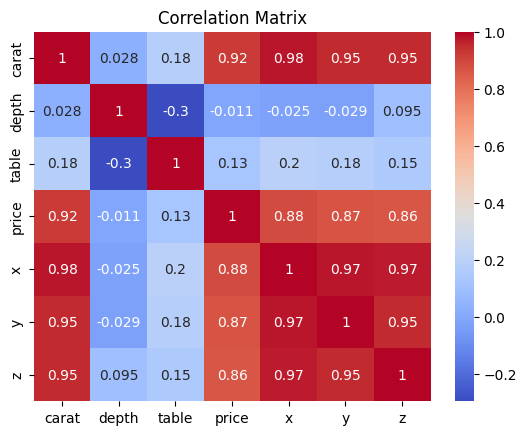

In [32]:
# Select numeric columns and create correlation matrix
numeric_df = df.select_dtypes(['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Building a Regression Model

Highly correlated features may be good predictors (e.g. price and carat are highly correlated). If we want to include multiple predictors, we should avoid multicollinearity (e.g. x, y, z are highly correlated with carat, so may not be useful additions to the model).

Based on our correlation analysis, we select **carat and depth** as predictors for price. Carat has a high correlation, depth has a weak (negative) correlation, and they are weakly correlated themselves.

In [47]:
# Prepare the data
X = df[['carat', 'depth']]  # Predictors
y = df['price']             # Target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the results
print("Regression Coefficients:")
print(f"Carat: {model.coef_[0]:.4f}")
print(f"Depth: {model.coef_[1]:.4f}")
print(f"\nR-squared: {model.score(X, y):.4f}")

Regression Coefficients:
Carat: 7765.1407
Depth: -102.1653

R-squared: 0.8507


## Evaluating the model
- The R-squared value of 0.85 indicates our model explains about 85% of the variance in diamond prices
- This suggests a reasonably strong predictive model, though there's still unexplained variation

### Understanding the Coefficients
1. **Carat** (7765.14):
  - Strong positive relationship with price
  - For each carat increase, price increases by approximately £7,765
  - This aligns with our expectation that higher carat diamonds are more valuable

2. **Depth** (-102.17):
  - Slight negative relationship with price
  - For each mm increase in depth, price decreases by about £102
  - Suggests that, holding carat constant, customers slightly prefer less deep diamonds

Looking at our coefficients, the scales are very different:

- Carat typically ranges from about 0.2 to 5
- Depth typically ranges from about 45 to 80

**In practice, we would standarise these values, but we are leaving them in their raw form here because it makes explaining them easier.**

### Predictions

Let's use this model to predict prices for specific diamonds and see how well it performs in practice. The code below initialises a new diamond with a specific carat and depth, and then uses our model to make a price prediction.

**In practice, we would have _split_ our original data into a training set (which we would have used in the code above) and a test set (which we could use to verify how well our model predicts on new data).**



In [48]:
# Define new diamond
new_diamond = pd.DataFrame({
    'carat': [1.5],
    'depth': [61.5]
})

# Make prediction
prediction = model.predict(new_diamond)
print(f"Price prediction: £{prediction[0]:.2f}")

Price prediction: £9409.88


## Visualising Model Predictions

Let's compare predicted prices with actual prices to assess model performance. Again, we would typically do this with a test set, but the approach is the same.

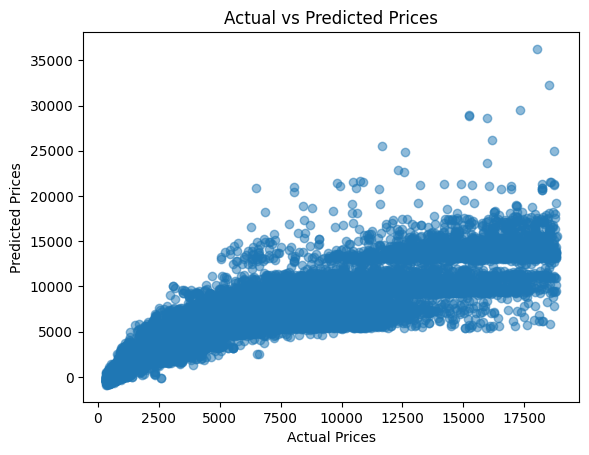

In [41]:
y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Conclusion

In this notebook, we performed a quick exploration to select relevant features and built a regression model to predict diamond prices.